SGDClassifier

In [29]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [30]:
from sklearn.model_selection import train_test_split
train_input,  test_input, train_target,test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [32]:
from sklearn.linear_model import SGDClassifier

- loss는 손실함수의 종류 지정 ex.loss='log'=> 로지스틱 손실 함수 지정. max_iter는 수행할 에포크 횟수 지정

In [33]:
sc = SGDClassifier(loss='log_loss', max_iter = 10,random_state =42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:704: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [34]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


In [37]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [38]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

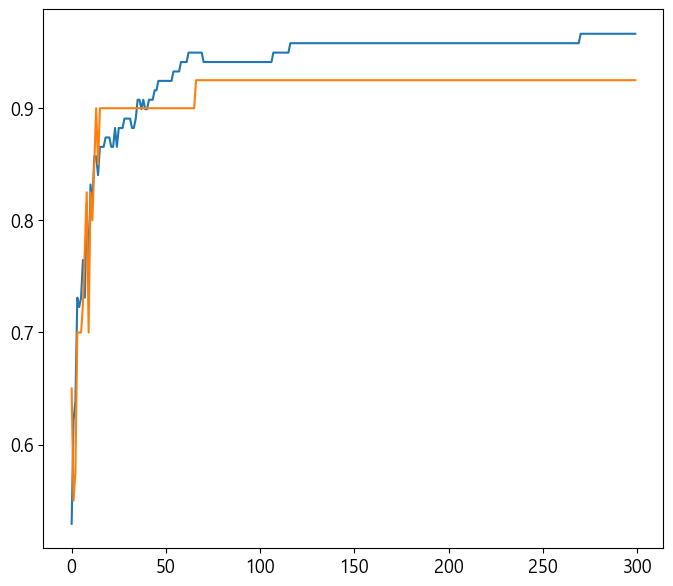

In [39]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [40]:
sc = SGDClassifier(loss='log_loss', max_iter = 100, tol = None, random_state =42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


- loss의 매개변수의 기본값은 hinge 
hinge : 서포트 벡터 머신이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수.

In [42]:
sc = SGDClassifier(loss='hinge', max_iter = 100, tol = None, random_state =42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.925
